In [9]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)




In [14]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,India,US,Spain,Germany,United Kingdom,"Korea, South",Japan
230,2020-09-08,4370128,6327009,534513,254957,354932,21588,72724
231,2020-09-09,4465863,6360212,543379,256433,357613,21743,73264
232,2020-09-10,4562414,6396100,554143,258149,360544,21919,73916
233,2020-09-11,4659984,6443652,566326,259735,364088,22055,74558
234,2020-09-12,4754356,6485123,566326,260817,367592,22176,75206


In [22]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1300000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.India[35]
S0=N0-I0
R0=0

In [23]:
df_analyse.India[35]

3

In [24]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


In [25]:

SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})



for each_t in np.arange(200):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


In [26]:
propagation_rates.tail()

,susceptible,infected,recovered
195,2.002071e+07,9650.285196,1.279970e+09
196,2.002065e+07,8744.704535,1.279971e+09
197,2.002059e+07,7924.103207,1.279971e+09
198,2.002055e+07,7180.506812,1.279972e+09
199,2.002050e+07,6506.689258,1.279973e+09


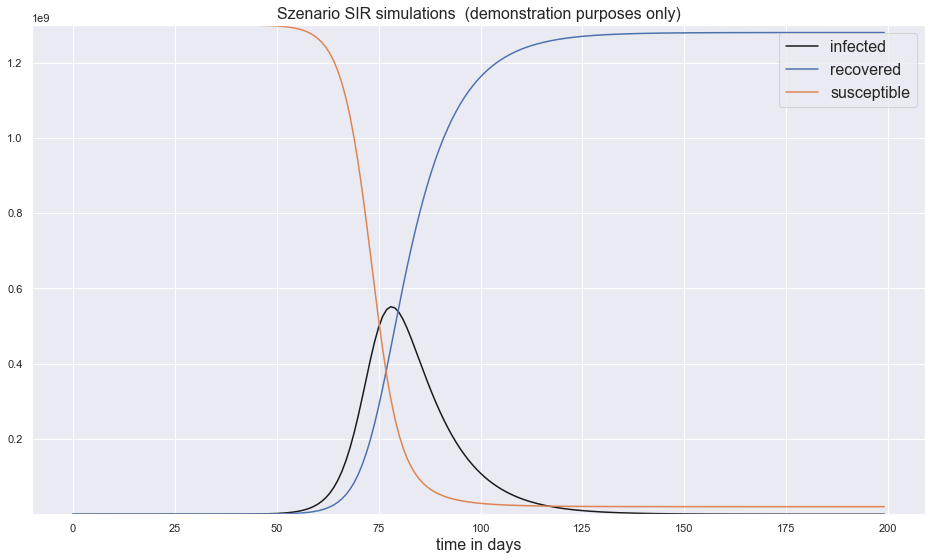

In [29]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1300000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

## Fitting the parameters of SIR model

In [62]:
df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,index,daily_confirmed,daily_deaths,daily_recovered,date,country
28192,232,148,3.0,127.0,2020-09-10,Namibia
27959,232,68,3.0,94.0,2020-09-10,Mozambique
27726,232,1889,38.0,2127.0,2020-09-10,Morocco
29823,232,121,3.0,142.0,2020-09-10,North Macedonia
43803,232,24,0.0,93.0,2020-09-10,Zimbabwe


In [76]:
ydata = np.array(df_analyse2[df_analyse2['country'] == 'Germany'].daily_confirmed[35:])
t=np.arange(len(ydata))

In [77]:
ydata

array([  10,   19,    2,   31,   51,   29,   37,   66,  220,  188,  129,
        241,  136,  281,  451,  170, 1597,  910, 1210, 1477, 1985, 3070,
       2993, 4528, 2365, 2660, 4183, 3930, 4337, 6615, 6933, 6824, 4400,
       4790, 4923, 6064, 6922, 6365, 4933, 4031, 3251, 4289, 5633, 4885,
       3990, 2737, 2946, 2218, 1287, 3394, 2945, 3699, 1945, 1842, 1881,
       1226, 2357, 2481, 1870, 1514, 1257,  988, 1154, 1627, 1470, 1068,
        890,  697,  488,  855, 1155, 1268, 1158,  736,  555,  697,  595,
        927,  380,  755,  519,  617,  182, 1227,  695,  548,  689,  276,
        342,  272,  600,  324,  672,  726,  267,  221,  184,  285,  242,
        351,  452,  526,  300,  359,  397,   16,  169,  535,   41,  251,
        164,  570,  352, 1213,  482,  371,  602,  496,  712,  391,  500,
        665,  422,  235,  349,  376,  475,  477,  410,  418,  325,  541,
        279,  356,  302,  331,  377,  210,  261,  276,  434,  560,  595,
        381,  309,  590,  392,  559,  605,  742,  6

In [78]:
# re-initialization 
N0=1300000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate



I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [79]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [80]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [81]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([1.00000000e+01, 1.34985881e+01, 1.82211880e+01, 2.45960310e+01,
       3.32011688e+01, 4.48168894e+01, 6.04964717e+01, 8.16616932e+01,
       1.10231752e+02, 1.48797295e+02, 2.00855325e+02, 2.71126306e+02,
       3.65982186e+02, 4.94024194e+02, 6.66862755e+02, 9.00170281e+02,
       1.21510227e+03, 1.64021555e+03, 2.21405768e+03, 2.98866212e+03,
       4.03426614e+03, 5.44567920e+03, 7.35087892e+03, 9.92261381e+03,
       1.33940641e+04, 1.80799797e+04, 2.44052088e+04, 3.29432016e+04,
       4.44679702e+04, 6.00242046e+04, 8.10218749e+04, 1.09363853e+05,
       1.47618036e+05, 1.99249435e+05, 2.68932968e+05, 3.62974832e+05,
       4.89879696e+05, 6.61113461e+05, 8.92127612e+05, 1.20373244e+06,
       1.62393337e+06, 2.19037840e+06, 2.95360493e+06, 3.98132020e+06,
       5.36399449e+06, 7.22208076e+06, 9.71517117e+06, 1.30533164e+07,
       1.75104869e+07, 2.34396123e+07, 3.12876042e+07, 4.16069875e+07,
       5.50580054e+07, 7.23913220e+07, 9.43974501e+07, 1.21806982e+08,
      

In [82]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [12.65203178 12.63582733]  start infect: 10
Optimal parameters: beta = 1.0577187150431488  and gamma =  1.0311571822409422


In [83]:
fitted=fit_odeint(t, *popt)

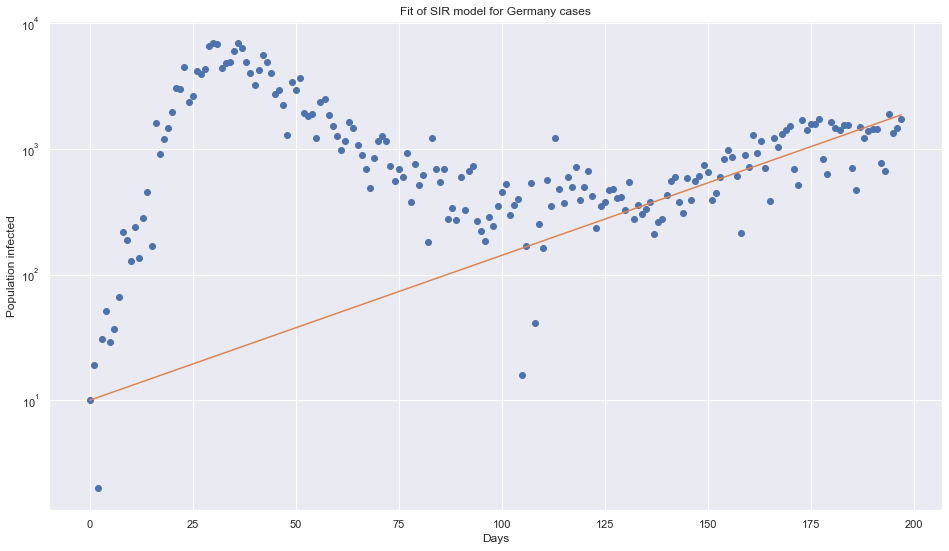

Optimal parameters: beta = 1.0577187150431488  and gamma =  1.0311571822409422
Basic Reproduction Number R0  1.0257589563062368
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [85]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

In [86]:
beta

0.4

In [87]:
t_initial=40
t_intro_measures=120
t_hold=30
t_relax=41

beta_max=0.25
beta_min=0.1
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))




In [88]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

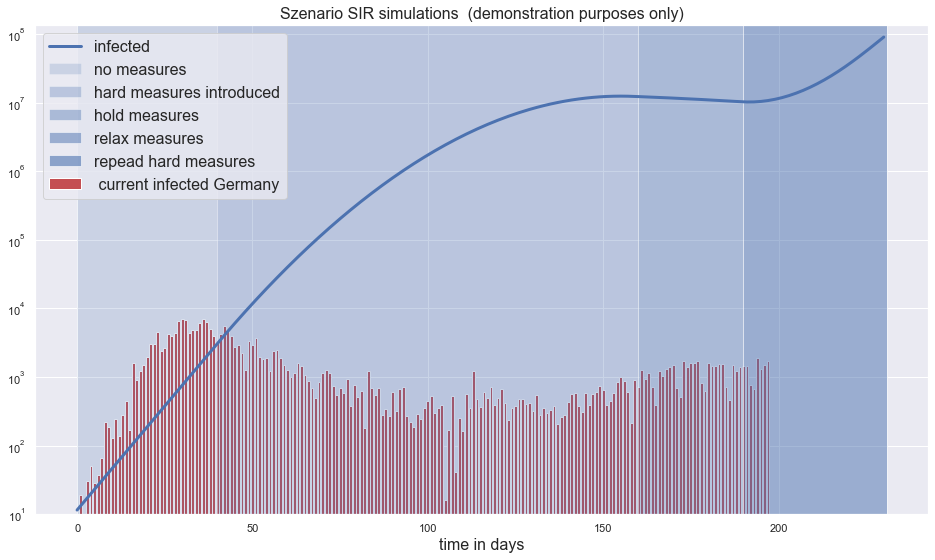

In [90]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});